In [1]:
from pathlib import Path
from warnings import simplefilter

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

simplefilter("ignore")
input_dir = Path('input')

RANDOM_STATE=1967

In [2]:
train = pd.read_csv(input_dir / 'train.csv')
train = train.set_index('id').sort_index()
test = pd.read_csv(input_dir / 'test.csv')
test = test.set_index('id').sort_index()
display(train)

,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,f_09,...,f_22,f_23,f_24,f_25,f_26,f_27,f_28,f_29,f_30,target
id,,,,,,,,,,,,,,,,,,,,,
0,-1.373246,0.238887,-0.243376,0.567405,-0.647715,0.839326,0.113133,1,5,1,...,-2.540739,0.766952,-2.730628,-0.208177,1.363402,ABABDADBAB,67.609153,0,0,0
1,1.697021,-1.710322,-2.230332,-0.545661,1.113173,-1.552175,0.447825,1,3,4,...,2.278315,-0.633658,-1.217077,-3.782194,-0.058316,ACACCADCEB,377.096415,0,0,1
2,1.681726,0.616746,-1.027689,0.810492,-0.609086,0.113965,-0.708660,1,0,2,...,-1.385775,-0.520558,-0.009121,2.788536,-3.703488,AAAEABCKAD,-195.599702,0,2,1
3,-0.118172,-0.587835,-0.804638,2.086822,0.371005,-0.128831,-0.282575,3,2,1,...,0.572594,-1.653213,1.686035,-2.533098,-0.608601,BDBBAACBCB,210.826205,0,0,1
4,1.148481,-0.176567,-0.664871,-1.101343,0.467875,0.500117,0.407515,3,3,0,...,-3.912929,-1.430366,2.127649,-3.306784,4.371371,BDBCBBCHFE,-217.211798,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
899995,1.380145,-0.038884,0.597111,0.854560,0.684301,-1.058618,1.310699,2,1,2,...,-1.594744,0.522019,0.833047,2.714125,1.290094,BABBCBBBED,455.033851,0,2,1
899996,-1.369789,0.044841,0.015458,0.376565,-0.380529,-0.830815,-1.798458,4,1,2,...,2.413899,-0.674942,-0.412111,-0.030436,-3.144047,BBBGBBDQBE,134.703577,0,1,0
899997,1.386201,-0.961150,0.725994,-0.132844,0.873911,-0.245339,-1.045786,0,0,6,...,-0.151930,-4.560773,-1.249154,1.793535,2.253696,AEBEDBBHBA,-99.536313,0,1,0


In [4]:
train.select_dtypes(['int64']).nunique()

f_07      16
f_08      16
f_09      15
f_10      15
f_11      14
f_12      16
f_13      13
f_14      14
f_15      15
f_16      16
f_17      14
f_18      14
f_29       2
f_30       3
target     2
dtype: int64

In [5]:
train.select_dtypes(['float64'])

,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_19,f_20,f_21,f_22,f_23,f_24,f_25,f_26,f_28
id,,,,,,,,,,,,,,,,
0,-1.373246,0.238887,-0.243376,0.567405,-0.647715,0.839326,0.113133,0.298218,-0.919717,3.058541,-2.540739,0.766952,-2.730628,-0.208177,1.363402,67.609153
1,1.697021,-1.710322,-2.230332,-0.545661,1.113173,-1.552175,0.447825,-3.147667,-1.075434,2.179050,2.278315,-0.633658,-1.217077,-3.782194,-0.058316,377.096415
2,1.681726,0.616746,-1.027689,0.810492,-0.609086,0.113965,-0.708660,2.820733,-3.485342,-0.784235,-1.385775,-0.520558,-0.009121,2.788536,-3.703488,-195.599702
3,-0.118172,-0.587835,-0.804638,2.086822,0.371005,-0.128831,-0.282575,1.081084,-2.100177,-2.343819,0.572594,-1.653213,1.686035,-2.533098,-0.608601,210.826205
4,1.148481,-0.176567,-0.664871,-1.101343,0.467875,0.500117,0.407515,-0.126179,0.605033,1.133665,-3.912929,-1.430366,2.127649,-3.306784,4.371371,-217.211798
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
899995,1.380145,-0.038884,0.597111,0.854560,0.684301,-1.058618,1.310699,-4.061370,-2.643652,-2.173853,-1.594744,0.522019,0.833047,2.714125,1.290094,455.033851
899996,-1.369789,0.044841,0.015458,0.376565,-0.380529,-0.830815,-1.798458,-1.721978,0.741793,-5.190605,2.413899,-0.674942,-0.412111,-0.030436,-3.144047,134.703577
899997,1.386201,-0.961150,0.725994,-0.132844,0.873911,-0.245339,-1.045786,-1.265819,1.230005,-1.361833,-0.151930,-4.560773,-1.249154,1.793535,2.253696,-99.536313


In [17]:
def make_features(X_in):

    X = X_in.select_dtypes(['float64','int64'])
    for i in range(10):
        X[f"f_27_{i}"] = X_in["f_27"].str[i].apply(ord) - ord("A")
    X["f_27_count"] =  X_in["f_27"].apply(lambda s: len(set(s)))
    
#    X["f_26_f_00_gt"] = (X.f_00 + X.f_26 > 5.0).astype('int')
#    X["f_26_f_00_lt"] = (X.f_00 + X.f_26 < -5.2).astype('int')
    
#    X["f_21_f_02_gt"] = (X.f_02 + X.f_21 > 5.2).astype('int')
#    X["f_21_f_02_lt"] = (X.f_02 + X.f_21 < -5.3).astype('int')
    
#    X["f_26_f_00_f_01_gt"] = (X.f_01 + X.f_00 + X.f_26 > 5.0).astype('int')
#    X["f_26_f_00_f_01_lt"] = (X.f_01 + X.f_00 + X.f_26 < -5.0).astype('int')

#    X["f_22_f_05_gt"] =( X.f_22 + X.f_05 > 5.0).astype('int')
#    X["f_22_f_05_lt"] =( X.f_22 + X.f_05 < -5.1).astype('int')

    X["f_26_f_00"] = X.f_00 + X.f_26 
    X["f_21_f_02"] = X.f_02 + X.f_21 
    X["f_26_f_00_f_01"] = X.f_01 + X.f_00 + X.f_26
    X["f_22_f_05"] = X.f_22 + X.f_05
    
    return X

In [18]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split

def fit_model(x_train, y_train):

    # define the model
    model = XGBClassifier(n_estimators=5000, objective='binary:logistic',
                          learning_rate=0.09,
                      #eval_metric='auc', 
                      random_state=RANDOM_STATE,
                      tree_method='gpu_hist')
    model.fit(X_train, y_train)
    return model

In [19]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_selector

transformer = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), make_column_selector(dtype_include="float64")),     
#        ("cat", OneHotEncoder(handle_unknown="ignore"), make_column_selector(dtype_include="float64")),     
        ("cat", OneHotEncoder(handle_unknown="ignore"), ["f_30"]),
    ],
    remainder = 'passthrough'
)


In [20]:
from sklearn.model_selection import cross_val_score

y = train.target
X = make_features(train.drop(columns=['target']))

xgb = XGBClassifier(n_estimators=5000, 
                    objective='binary:logistic',
                    learning_rate=0.10,
                    #eval_metric='auc', 
                    random_state=RANDOM_STATE,
                    tree_method='gpu_hist')
clf = Pipeline([('transformer', transformer), ('estimator', xgb)])
scores = cross_val_score(clf, X, y, cv = 2)
np.mean(scores)

[09:25:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[09:26:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.9651933333333333

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score

for p1 in [5.0]:
    for p2 in [-5.0]:
        print(f"p1:{p1} p2:{p2}")
        y = train.target
        X = make_features(train.drop(columns=['target']), p1, p2)
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=RANDOM_STATE, stratify=y)
        model = fit_model(X_train, y_train)
        y_probs = model.predict_proba(X_test)
        auc = roc_auc_score(y_test, y_probs[:,1])
        fpr, tpr, thresholds = roc_curve(y_test,y_probs[:,1])
        print(auc)

In [ ]:
plt.plot(fpr, tpr, label=f'AUC (XGBoost) = {auc:.3f}')
plt.legend()


In [ ]:
import shap

X_shap = X.sample(3000, random_state=RANDOM_STATE)
shap_explainer = shap.TreeExplainer(model)
shap_values = shap_explainer.shap_values(X_shap)


In [ ]:
shap.summary_plot(shap_values, X_shap)

In [ ]:
shap.summary_plot(shap_values, X_shap, max_display=30, plot_type='bar')

In [ ]:
shap_interaction_values = shap.TreeExplainer(model).shap_interaction_values(X_shap)

In [ ]:
shap.summary_plot(shap_interaction_values, X_shap, max_display=14)

In [ ]:
shap.dependence_plot('f_27_count', shap_values, X_shap, x_jitter=0.5)

In [ ]:
sns.scatterplot(x='f_19', y='f_25', hue='target', data=train, alpha=0.2)
#plt.plot([-2,2],[-2.5,-7.5], linewidth=2)
#plt.plot([-2,2],[7.5,2.5], linewidth=2)

In [ ]:
sns.scatterplot(y='f_26_f_00_f_01', x='f_27_count', hue='target', data=train, alpha=0.2)


In [ ]:
sns.scatterplot(y='f_26', x='f_27_count', hue='target', data=train, alpha=0.2)

In [ ]:
sns.scatterplot(y='f_01', x='f_27_count', hue='target', data=train, alpha=0.2)

In [ ]:
sns.scatterplot(y='f_00', x='f_27_count', hue='target', data=train, alpha=0.2)

In [29]:
X = make_features(train.drop(columns=['target']))
y = train.target
model = XGBClassifier(n_estimators=8000, objective='binary:logistic', 
                      # eval_metric='auc', 
                      learning_rate=.085,
                      tree_method='gpu_hist')

#[8000, 6, 1, 0.08566051840702422, 1e-06, 1.0, 1e-06]

model.fit(X,y)


[16:40:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=0, importance_type=None,
              interaction_constraints='', learning_rate=0.085, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=8000, n_jobs=16,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='gpu_hist', validate_parameters=1, verbosity=None)

In [30]:
X_submit = make_features(test)
submit_probs = model.predict_proba(X_submit)

In [31]:
submit = pd.DataFrame(submit_probs, columns=['prob_0','target'],index=X_submit.index)
submit['target'].to_csv('./ts_submission.csv')

In [8]:
X = make_features(train.drop(columns=['target']))
y = train.target
model = XGBClassifier(objective='binary:logistic', 
                      # eval_metric='auc', 
                      tree_method='gpu_hist')


In [34]:
from skopt.space import Real, Integer
from skopt.utils import use_named_args
from sklearn.model_selection import cross_val_score

space  = [Integer(5000,10000, name='n_estimators'),
          Integer(3,7, name='max_depth'),
#          Integer(1,50, name='min_child_weight'),
          Real(10**-6, 10**0, "log-uniform", name='learning_rate'),
#          Real(10**-6, 10**0, "log-uniform", name='reg_alpha'),
#          Real(10**-6, 10**0, "log-uniform", name='reg_lambda'),
#          Real(10**-6, 10**0, "log-uniform", name='gamma')]

#          Integer(2, 100, name='min_samples_split'),
#          Integer(1, 100, name='min_samples_leaf')
         ]

@use_named_args(space)
def objective(**params):
    model.set_params(**params)
    return 1-np.mean(cross_val_score(model, X, y, cv=3, scoring="roc_auc"))

In [35]:
from skopt import gp_minimize
res_gp = gp_minimize(objective, space, n_calls=50, random_state=RANDOM_STATE, verbose=True)

Iteration No: 1 started. Evaluating function at random point.
[17:11:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:12:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:13:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Iteratio

KeyboardInterrupt: 

In [22]:
res_gp


          fun: 0.004359921151885104
    func_vals: array([0.35828617, 0.00545829, 0.33145203, 0.00479813, 0.00735749,
       0.00642732, 0.14983288, 0.19808355, 0.32506719, 0.32523776,
       0.01875699, 0.01257092, 0.00924232, 0.0062651 , 0.0082888 ,
       0.03454518, 0.00606608, 0.00960894, 0.00581543, 0.00730827,
       0.00503309, 0.00574164, 0.01619682, 0.00587888, 0.00451827,
       0.00782988, 0.00440279, 0.00445509, 0.02645025, 0.00682202,
       0.00464   , 0.00810481, 0.00643608, 0.00519193, 0.03232538,
       0.03483085, 0.00669169, 0.00635883, 0.00875314, 0.01274686,
       0.01205822, 0.00639094, 0.00551351, 0.00435992, 0.00591708,
       0.00635238, 0.00778024, 0.05704611, 0.00884541, 0.01212429])
       models: [GaussianProcessRegressor(kernel=1**2 * Matern(length_scale=[1, 1, 1, 1, 1, 1, 1], nu=2.5) + WhiteKernel(noise_level=1),
                         n_restarts_optimizer=2, noise='gaussian',
                         normalize_y=True, random_state=966881247), Gaussia

In [23]:
res_gp.fun

0.004359921151885104

In [24]:
res_gp.x


[8000, 6, 1, 0.08566051840702422, 1e-06, 1.0, 1e-06]

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

X = train[train.f_00 + train.f_26 < 0]
y = X.target
X = X[['f_00','f_26']]

clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf.fit(X, y)

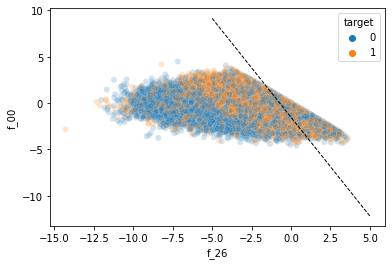

In [39]:
y = train.target
X = train[['f_00','f_26', 'target']]
X = X[X.f_00 + X.f_26 < 0]

sns.scatterplot(x='f_26', y='f_00', hue='target', data=X, alpha=0.2)

xmin, xmax = -5, 5
ymin, ymax = -15, 5
xd = np.array([xmin, xmax])
yd = m*xd + c

plt.plot(xd, yd, 'k', lw=1, ls='--')

In [49]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

X = train[(train.f_00 + train.f_26) < 0].sample(frac=0.1)
y = X.target
X = X[['f_00','f_26']]

display(X)
display(y)




,f_00,f_26
id,,
177988,0.183487,-1.684593
798316,0.245360,-0.905040
767994,0.179705,-1.422137
897436,-0.181849,-1.428819
740490,-0.429296,-0.542626
...,...,...
529886,-0.409497,-2.475531
730217,-1.913933,-5.021383
246970,0.782472,-1.022231


id
177988    0
798316    1
767994    1
897436    0
740490    1
         ..
529886    1
730217    1
246970    1
507228    0
834089    0
Name: target, Length: 39589, dtype: int64

In [51]:
clf = LogisticRegression()
#clf = make_pipeline(StandardScaler(), reg)
clf.fit(X, y)

LogisticRegression()

In [36]:
b = clf.intercept_[0]
w1, w2 = clf.coef_.T
# Calculate the intercept and gradient of the decision boundary.
c = -b/w2
m = -w1/w2
c, m

(array([-1.52467187]), array([-2.13351826]))

TypeError: scatter() got multiple values for argument 's'

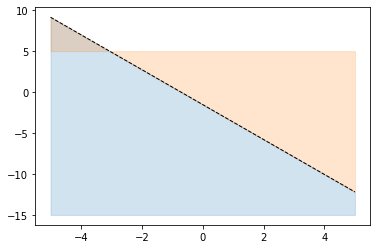

In [37]:
# Plot the data and the classification with the decision boundary.
xmin, xmax = -5, 5
ymin, ymax = -15, 5
xd = np.array([xmin, xmax])
yd = m*xd + c

plt.plot(xd, yd, 'k', lw=1, ls='--')
plt.fill_between(xd, yd, ymin, color='tab:blue', alpha=0.2)
plt.fill_between(xd, yd, ymax, color='tab:orange', alpha=0.2)

plt.scatter(*X[y==0].T, s=8, alpha=0.5)
plt.scatter(*X[y==1].T, s=8, alpha=0.5)
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)
plt.ylabel(r'$x_2$')
plt.xlabel(r'$x_1$')

plt.show()

In [50]:
from sklearn.svm import SVC

clf = SVC(kernel="linear")
#clf = make_pipeline(StandardScaler(), reg)
clf.fit(X, y)

SVC(kernel='linear')

In [46]:
clf.coef_, clf.intercept_

(array([[1.53172906e-04, 1.04897671e-05]]), array([-0.99973107]))

In [47]:
w = clf.coef_[0]
a = -w[0] / w[1]

In [48]:
a

-14.60212645640283

In [52]:
from sklearn.inspection import DecisionBoundaryDisplay

disp = DecisionBoundaryDisplay.from_estimator(
     clf, X, response_method="predict",
     alpha=0.5,
 )
disp.ax_.scatter(X[:, 0], X[:, 1], c=y, edgecolor="k")
plt.show()

ImportError: cannot import name 'DecisionBoundaryDisplay' from 'sklearn.inspection' (C:\Users\orovi\anaconda3\envs\kaggle\lib\site-packages\sklearn\inspection\__init__.py)